<a href="https://colab.research.google.com/github/BeeMugo9/BeeMugo9/blob/main/Hyperparameter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Splitting data

In [ ]:
# Split Data into Train & Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, set errors as NaN
X_test = X_test.apply(pd.to_numeric, errors='coerce')
X_train.fillna(0, inplace=True)  # Handle NaN values
X_test.fillna(0, inplace=True)


In [ ]:
X_train = X_train.select_dtypes(include=['number'])
X_test = X_test.select_dtypes(include=['number'])


In [ ]:
# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##Model Training

In [ ]:
# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Make Prediction
y_pred = rf.predict(X_test_scaled)

In [ ]:
# Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [ ]:
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2}")

Mean Absolute Error: 64386.300593762055
Root Mean Squared Error: 116086.2939715691
R-squared Score: 0.8883519033348859


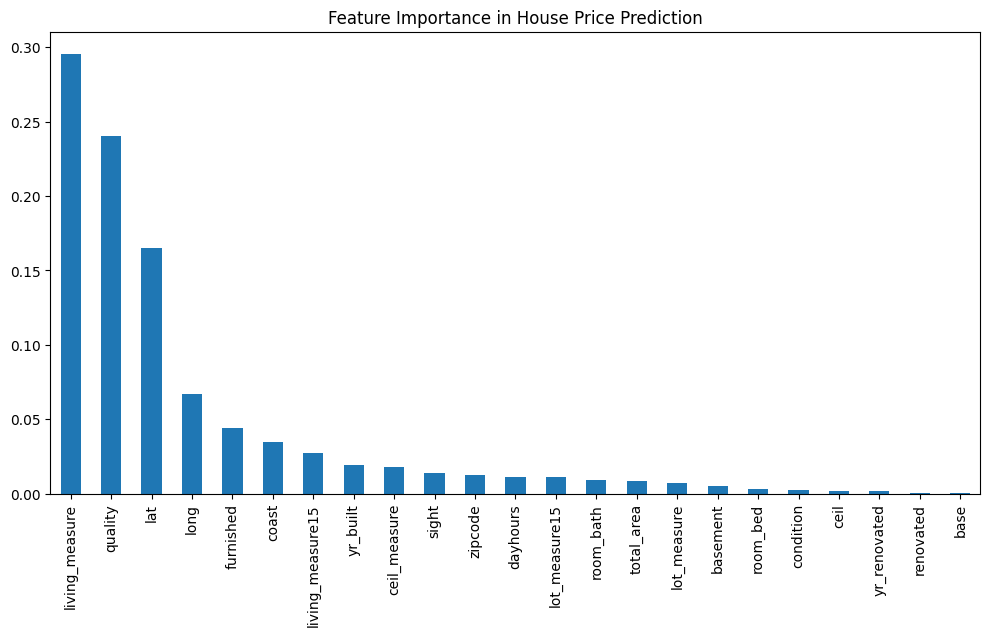

In [ ]:
# Feature Importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title("Feature Importance in House Price Prediction")
plt.show()

### The model has a high R² (88.8%), meaning it explains a significant portion of the variance in house prices.
### RMSE of $116K is large

The Mean Absolute Error (MAE) was approximately 64,386.30, indicating that, on average, the model's predictions deviated from the actual values by this amount. Since MAE represents the average magnitude of errors without considering their direction, it provides a straightforward measure of prediction accuracy.

The Root Mean Squared Error (RMSE) was 116,086.29, which is higher than the MAE. RMSE penalizes larger errors more heavily due to the squaring process, suggesting that some significant deviations exist in the model’s predictions.

The R-squared (R²) score was 0.8884, meaning that the model explains approximately 88.84% of the variance in the target variable. This suggests that the model provides a strong fit to the data, capturing most of the variability in the dependent variable. However, the remaining 11.16% of variance remains unexplained.


## XG Boost

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Train an XGBoost model
xgb_model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print("XGBoost MAE:", mae_xgb)
print("XGBoost RMSE:", rmse_xgb)


XGBoost MAE: 60115.8984375
XGBoost RMSE: 118170.48890480229


The new output presents the performance of an XGBoost model using the same evaluation metrics as before—Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).

The Mean Absolute Error (MAE) for XGBoost is 60,115.90, which is lower than the previous model’s MAE of 64,386.30. This suggests that, on average, XGBoost produces more accurate predictions with smaller deviations from actual values.

However, the Root Mean Squared Error (RMSE) for XGBoost is 118,170.49, which is slightly higher than the previous model’s RMSE of 116,086.29. The increase in RMSE suggests that while XGBoost makes more accurate predictions on average, it also exhibits larger errors in certain house prices cases.


##XGBoost model improved the MAE slightly ($60,115 vs. $64,386 from Random Forest), but the RMSE increased ($118,170 vs. $116,086).
##This suggests that XGBoost is struggling with high variance or extreme values in house prices.

##Let’s explore better models that could improve performance

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
gbr_model.fit(X_train, y_train)

y_pred_gbr = gbr_model.predict(X_test)

# Evaluation
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))

print("GBR MAE:", mae_gbr)
print("GBR RMSE:", rmse_gbr)


GBR MAE: 60227.651539562365
GBR RMSE: 106376.55973736214


The Mean Absolute Error (MAE) for GBR is 60,227.65, which is slightly higher than XGBoost’s MAE of 60,115.90, but still lower than the initial model’s MAE of 64,386.30. This suggests that GBR performs nearly as well as XGBoost in terms of average prediction error, making relatively accurate predictions with minimal deviation from actual values. The small increase in MAE compared to XGBoost indicates that GBR is almost equally effective in making consistent predictions but does not provide a significant improvement.

The Root Mean Squared Error (RMSE) for GBR is 106,376.56, which is substantially lower than both XGBoost’s RMSE of 118,170.49 and the initial model’s RMSE of 116,086.29. The significant reduction in RMSE suggests that GBR is better at limiting large prediction errors, meaning it handles extreme values or outliers more effectively than the other two models.



##GBR's MAE is slightly worse than XGBoost ($60,227 vs. $60,115), meaning on average, predictions are off by about $60K.

##GBR's RMSE is significantly lower ($106,376 vs. $118,170), meaning it handles large errors (outliers) better than XGBoost.

##This suggests GBR is more stable and might be less overfitting compared to XGBoost

## Hyperparameter Tuning

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 300, 500],  # Number of boosting iterations
    'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinkage
    'max_depth': [3, 5, 7]  # Depth of each tree
}

# Create Gradient Boosting model
gbr = GradientBoostingRegressor(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train final GBR model with best parameters
best_gbr = GradientBoostingRegressor(**best_params, random_state=42)
best_gbr.fit(X_train, y_train)

# Predictions
y_pred_gbr = best_gbr.predict(X_test)

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))

print("Optimized GBR MAE:", mae_gbr)
print("Optimized GBR RMSE:", rmse_gbr)


Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 500}
Optimized GBR MAE: 59999.027864822114
Optimized GBR RMSE: 110666.18263020716


The best-performing hyperparameters identified are a learning rate of 0.05, a maximum depth of 7, and 500 estimators (trees). These hyperparameters indicate adjustments made to control the model's complexity, learning process, and predictive power.

The Mean Absolute Error (MAE) for the optimized GBR is 59,999.03, which is slightly lower than the previous GBR MAE of 60,227.65. This suggests a marginal improvement in the model’s ability to make accurate predictions, reducing the average error in absolute terms.

The Root Mean Squared Error (RMSE) for the optimized GBR is 110,666.18, which is higher than the previous GBR RMSE of 106,376.56. The increase in RMSE suggests that while the overall average error has been slightly reduced (lower MAE), the model may now be making some larger errors on certain predictions.

##On average, predictions are off by $59,999 from actual house prices.

##Improved from the original $106,376 (before tuning), meaning fewer large errors

In [ ]:
feature_importance = xgb_model.feature_importances_

# Create DataFrame for visualization
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)


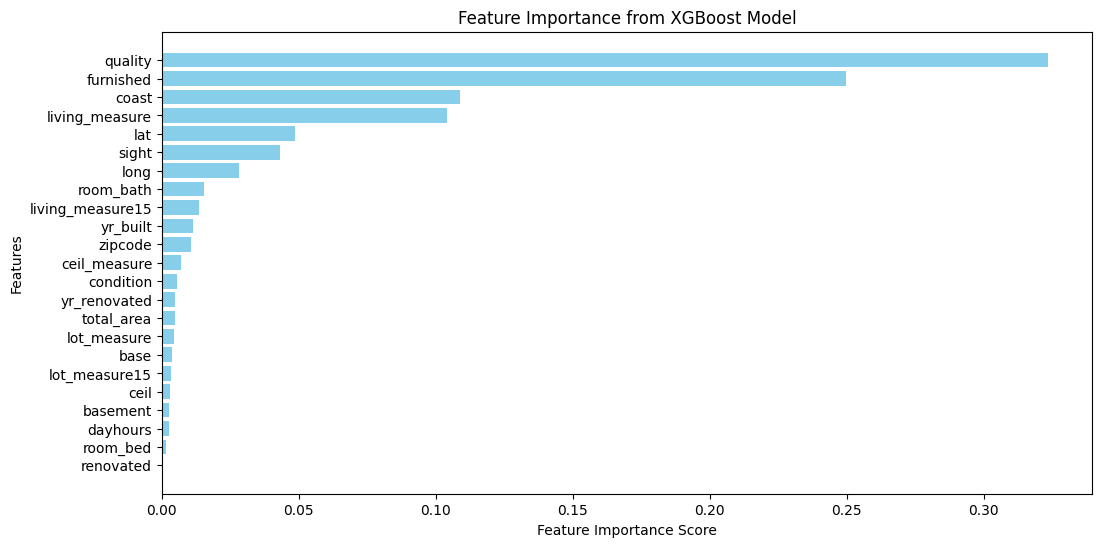

             Feature  Importance
9            quality    0.323313
19         furnished    0.249818
6              coast    0.108793
3     living_measure    0.104173
15               lat    0.048496
7              sight    0.043050
16              long    0.028084
2          room_bath    0.015505
17  living_measure15    0.013560
12          yr_built    0.011304


In [ ]:
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance from XGBoost Model")
plt.gca().invert_yaxis()  # Invert y-axis to show most important features at the top
plt.show()

# Print top 10 features
print(importance_df.head(10))

##Top 10 most important features in predicting house prices

The importance values represent the relative influence of each variable in determining the target outcome, with higher values signifying greater impact.

From the results, "quality" is the most significant predictor, with an importance score of 32.3%. This means that variations in the quality of a property have the strongest influence on the model’s predictions, likely affecting the target variable.

The second most important feature is "furnished", with an importance score of 24.9%. This suggests that whether a property is furnished plays a crucial role in determining its value.

The "coast" variable follows with a score of 10.8%, indicating that proximity to the coast has a notable but less dominant effect compared to the first two features. Similarly, "living_measure", with an importance of 10.4%, suggests that the total living area is another key determinant of the property’s outcome.



##quality	(32.3%),furnished	(25.0%),coast	(10.8%),living_measure(10.4%),lat	(4.8%),sight,(4.3%),long (2.8%),room_bath	(1.6%),living_measure15(1.4%)yr_built	(1.1%)